## En este notebook vamos a analizar el trafico en la pagina y todo lo que respecta con ello. Trafico por dias, por semanas, por mes.

In [1]:
#Inlcuimos las librerias que vamos a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
#Cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)

In [3]:
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events['event'] = events['event'].astype('category')

## Analisis de trafico en la pagina por hora en toda la semana

In [4]:
dia_vs_hora = pd.DataFrame({'dia': events['timestamp'].dt.weekday_name,'hora':events['timestamp'].dt.hour})
dia_vs_hora.head()

,dia,hora
0,Thursday,23
1,Thursday,23
2,Thursday,23
3,Thursday,23
4,Tuesday,13


In [5]:
dias_vs_horas = pd.DataFrame(dia_vs_hora.groupby('dia')['hora'].value_counts().sort_index())
dias_vs_horas = dias_vs_horas.rename(columns = {'hora':'visitas'}) 
dias_vs_horas = dias_vs_horas.reset_index()
dias_vs_horas.head()

,dia,hora,visitas
0,Friday,0,10357
1,Friday,1,8485
2,Friday,2,7491
3,Friday,3,5387
4,Friday,4,2982


In [6]:
dias_vs_horas = dias_vs_horas.pivot('hora','dia','visitas')
dias_vs_horas = dias_vs_horas[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
dias_vs_horas.head()

dia,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hora,,,,,,,
0,6858,11122,10422,10155,10357,9211,6253
1,6578,10618,9727,9680,8485,7600,6290
2,5068,8604,7747,7807,7491,6535,5284
3,3226,5380,5316,5599,5387,4560,3650
4,2002,3453,2529,2938,2982,2580,2354


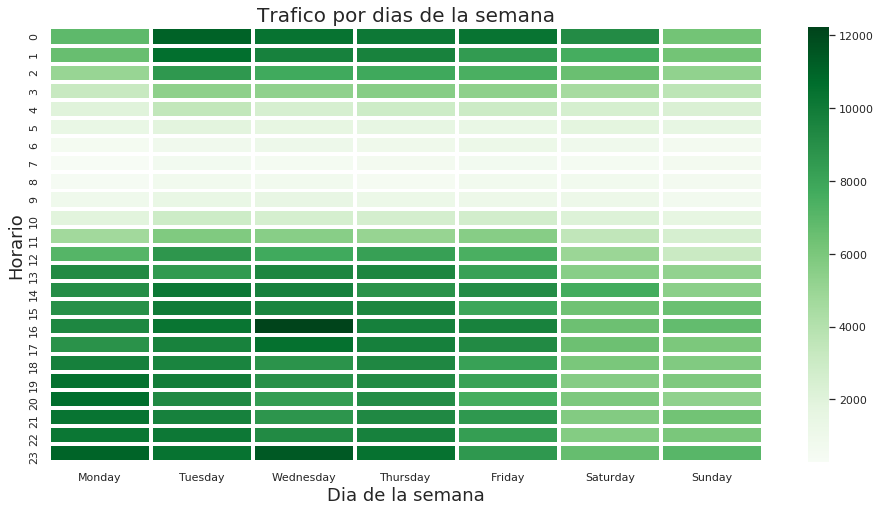

In [7]:
plt.figure(figsize = (16,8))
ax = sns.heatmap(dias_vs_horas,linewidth = 3, cmap = 'Greens')
ax.set_title('Trafico por dias de la semana',Fontsize = 20)
ax.set_xlabel('Dia de la semana',Fontsize = 18)
ax.set_ylabel('Horario',fontsize = 18);

Se puede observar que el mayor trafico ocurre de Lunes a Viernes apartir de las 12pm hasta la 1am del dia siguiente. En caso de tener que hacer alguna migracion o matenimiento de la pagina seria conveniente hacerlo entre las 3am-9am.